# 轮次

深度学习中，无论以批次梯度下降或者随机梯度下降的方式，把所有训练数据迭代一遍，称为一个**轮次**（Epoch）。通常一次完整的模型训练需要多个轮次的重复迭代，以使模型参数通过持续微调达到最佳收敛状态。

In [190]:
import matplotlib.pyplot as plt
import numpy as np

## 数据集

### 训练数据：特征、标签

In [191]:
train_features = np.array([[22.5, 72.0],
                           [31.4, 45.0],
                           [19.8, 85.0],
                           [27.6, 63]])

train_labels = np.array([[95],
                        [210],
                        [70],
                        [155]])

### 验证数据：特征、标签

In [192]:
test_features = np.array([[28.1, 58.0]])
test_labels = np.array([[165]])

## 模型

### 参数：权重、偏差

In [193]:
weight = np.ones([1, 2]) / 2
bias = np.zeros(1)

### 推理函数（前向传播）

In [194]:
def forward(x, w, b):
    return x @ w.T + b

### 损失函数（平均平方差）

In [195]:
def mse_loss(p, y):
    return ((p - y) ** 2).mean()

### 梯度函数

In [196]:
def gradient(p, y):
    return 2 * (p - y) / len(y)

### 超参数：学习率

In [197]:
LEARNING_RATE = 0.00001

### 反向函数（反向传播）

In [198]:
def backward(x, d, w, b):
    w -= d.T @ x * LEARNING_RATE
    b -= np.sum(d, axis=0) * LEARNING_RATE
    return w, b

## 训练

### 超参数：批大小

In [199]:
BATCH_SIZE = 2

### 超参数：轮数

这是我们的第三个超参数。轮数定义了模型学习全部训练数据的重复次数。

轮数并非越多越好：在训练初期，模型参数通常会随着轮次增加而快速收敛，误差大幅下降；随后，收敛速度逐渐趋于平缓。如果轮数过多，模型可能会由于过拟合，导致在实际应用中的效果反而变差。因此，我们需要通过监测模型在验证数据上的表现，找到性能提升的“拐点”，从而确定最佳轮数。

一个有效的实践技巧叫做**早停法**（Early Stopping）。就是在每个轮次结束后，和上一轮对比。如果损失量没有明显降低（比如：大于1%），就停止训练。

In [200]:
EPOCHS = 1000

### 迭代

实践中，我们可以使用一个简单循环来实现重复迭代；或者也可以在每个轮次打乱训练数据的迭代次序，以期进一步优化训练。这种实践技巧称为**重排**（Shuffle）。

In [201]:
for epoch in range(EPOCHS):
    for i in range(0, len(train_features), BATCH_SIZE):
        features = train_features[i: i + BATCH_SIZE]
        labels = train_labels[i: i + BATCH_SIZE]

        predictions = forward(features, weight, bias)
        delta = gradient(predictions, labels)
        weight, bias = backward(features, delta, weight, bias)

print(f"weight: {weight}")
print(f"bias: {bias}")

weight: [[ 8.04491598 -1.08125252]]
bias: [0.15812255]


## 验证

### 推理

In [202]:
predictions = forward(test_features, weight, bias)

print(f'predictions: {predictions}')

predictions: [[163.50761565]]


### 评估

In [203]:
error = mse_loss(predictions, test_labels)

print(f'error: {error}')

error: 2.227211046689927


经过1000轮迭代，损失量神奇地从第一轮的9563，降低至2。至此，我们可以宣布模型训练成功！

### 损失曲线

最后，让我们监控一下每轮训练损失量的变化，直观地感受一下模型训练的过程。

我们将使用matplotlib（Python最流行的数据可视化库）来展示数据。

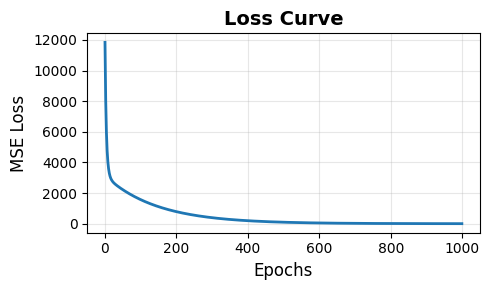

In [204]:
# 初始化模型参数
weight = np.ones([1, 2]) / 2
bias = np.zeros(1)

errors = []

for epoch in range(EPOCHS):
    # 训练
    for i in range(0, len(train_features), BATCH_SIZE):
        features = train_features[i: i + BATCH_SIZE]
        labels = train_labels[i: i + BATCH_SIZE]

        predictions = forward(features, weight, bias)
        delta = gradient(predictions, labels)
        weight, bias = backward(features, delta, weight, bias)

    # 验证
    predictions = forward(test_features, weight, bias)
    errors.append(mse_loss(predictions, test_labels))

# 展示
plt.figure(figsize=(5, 3))
plt.plot(errors, linewidth=2)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MSE Loss', fontsize=12)
plt.title('Loss Curve', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

上图是模型训练的**损失曲线**（Loss Curve），直观地向我们展示了随着迭代轮次的增加，损失量快速降低，然后逐渐趋于平缓的过程。